# **Machine Learning in Python: Making Receiver Operating Characteristic (ROC) curve**

Peter Rigii

In this Jupyter notebook, we will be making a Receiver Operating Characteristic (ROC) curve using a synthetic data set as an example.

## **What is ROC curve?**

The **ROC curve** summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the **False Positive Rate (FPR)** on the *X-axis* and the **True Positive Rate (TPR)** on the *Y-axis*.

$\text{TPR (Sensitivity)} = \frac{TP}{TP + FN}$

$\text{FPR (1 - Specificity)} = \frac{FP}{TN + FP}$

## **Generate synthetic dataset**

In [1]:
# Load libraries
from sklearn.datasets import make_classification
import numpy as np

In [2]:
x,y = make_classification(n_samples=2000, n_classes=2,
                          n_features=10, random_state=0)

## **Add noisy features to make the problem more difficult**

In [3]:
random_state = np.random.RandomState(0)
n_samples, n_features = x.shape
x = np.c_[x, random_state.randn(n_samples, 200 * n_features)]

## Data splitting

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Build classification model

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [8]:
# Random forest

rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(x_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

In [9]:
# Naive Bayes

nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

## Prediction probabilities

In [10]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(x_test)
nb_probs = nb.predict_proba(x_test)

In [11]:
# Probabilities for the positive outcome is kept.

rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

## Computing AUROC and ROC curve values

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

In [14]:
# Calculate AUROC
# ROC is the receiver operating characteristic AUROC is the area under the ROC curve

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

In [16]:
# Print AUROC scores
 
print('Random (chance) Prediction: AOUROC = %0.3f' % (r_auc))
print('Random Forest: AUROC = %0.3f' % (rf_auc))
print('Naive Bayes: AUROC = %0.3f' % (nb_auc))

Random (chance) Prediction: AOUROC = 0.500
Random Forest: AUROC = 0.899
Naive Bayes: AUROC = 0.993


In [18]:

# Calculate ROC curve

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)


## Plot the ROC curve

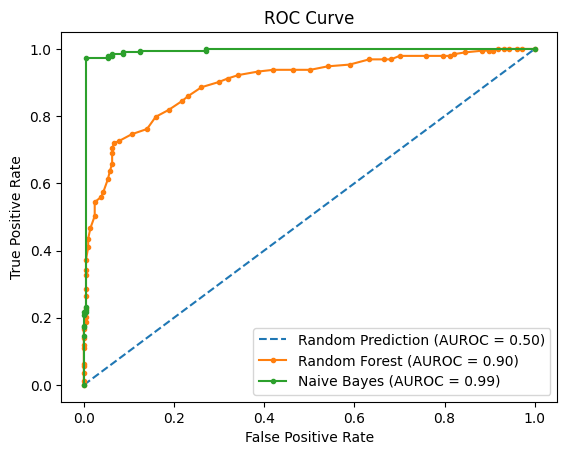

In [20]:
import matplotlib.pyplot as plt

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random Prediction (AUROC = %0.2f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.2f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.2f)' % nb_auc)

# Title
plt.title('ROC Curve')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show legend
plt.legend()

plt.show()


## **Reference**

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/